# Credit Card Fraud Detection

In this project, we employ leading preprocessing and classification methodologies to detect credit card fraud. We apply these techniques and evaluate the results using various metrics to assess the success of our models.

**About Dataset**

**Description:**
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

**Key Features:**

- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

**Potential Use Cases:**

- **Credit Card Fraud Detection:** Build machine learning models to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.
- **Merchant Category Analysis:** Examine how different merchant categories are associated with fraud.
- **Transaction Type Analysis:** Analyze whether certain types of transactions are more prone to fraud than others.
- **Data Source:** The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines.



## Step-1: Data Understanding

**1.1 Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**1.2 Importing Warnings**

In [2]:
import warnings
warnings.filterwarnings("ignore")

**1.3 Importing Data**

We create the dataset 'cdf' specifically to store information related to credit card fraud detection.

In [3]:
# Provide the correct file path within double quotes
cdf = pd.read_csv(r"D:\Sem 1\RM\reserch problem analysis\creditcard.csv")

**1.4 Data Size Analysis**

In [4]:
print ("Credit Card Fraud Detection Data Size:",cdf.shape)

Credit Card Fraud Detection Data Size: (284807, 31)


**1.5 : Data Quality Assessment and Remediation**

1.5.1 Null Values counting

In [5]:
print("Number of null values in Credit Card Fraud Detection Data\n", cdf.isnull().sum())

Number of null values in Credit Card Fraud Detection Data
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
null_Val_Percentage= cdf.isnull().sum()/len(cdf)*100
print("Percentage null values in Credit Card Fraud Detection Data:\n",null_Val_Percentage)

Percentage null values in Credit Card Fraud Detection Data:
 Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


**We observe no null values.**

1.5.2 Identification of Duplicate Data in the Dataset

In [7]:
#Dup_1 is the variable which stores duplicate values from the CCFD
Dup_1=cdf[cdf.duplicated()]

In [8]:
Dup_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [9]:
print(Dup_1.sum())

Time      1.032831e+08
V1       -1.678849e+03
V2        1.173138e+03
V3       -4.576839e+02
V4        8.416186e+02
V5       -5.185263e+02
V6        3.233024e+02
V7       -5.109031e+02
V8        2.424304e+02
V9        4.528833e+02
V10       4.087670e+02
V11      -5.724389e+01
V12       2.028038e+02
V13      -1.711934e+02
V14      -7.158898e+01
V15      -2.958803e+02
V16      -3.296932e+02
V17      -4.827908e+01
V18      -4.298920e+02
V19       7.497845e+01
V20      -5.310648e+01
V21       1.051469e+02
V22       4.263710e+00
V23      -5.622619e+01
V24      -6.077605e+01
V25       6.593423e+01
V26      -4.240032e+01
V27      -5.002179e+02
V28      -1.552867e+02
Amount    6.058833e+04
Class     1.900000e+01
dtype: float64


The provided output indicates the total duplicate values for each column in the DataFrame 'cdf.' For instance, the 'Time' column has \(1.032831 \times 10^8\) duplicates, and 'V1' has \(-1678.849\) duplicates.When dealing with duplicates in credit card fraud detection datasets, it's crucial to remove them carefully to maintain data integrity and avoid bias in analysis and modeling.

**In the provided text, it is highlighted that the duplicate values are present due to identical time and class values. It is emphasized that these values are not considered duplicates in the traditional sense, as the entire columns does not contain exactly the same values. Consequently, removing these values would result in the loss of important patterns within the dataset. Therefore, it is recommended not to eliminate these values to preserve the crucial patterns present in the data set.**

1.5.3 Identification and Resolution of Ambiguous Data in the Dataset

In [10]:
cdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
cdf.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**After meticulous scrutiny, it has been determined that the dataset does not contain any instances of ambiguous data.**

In [12]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Step-2: Data Cleaning

Resolving Data Quality Issues: Null Values and Duplicates.

**Here there are no null values so we do not have to handel them and also data transformation is not required because no values seem to be having wrong datatypes or abrupt values** 

## Step-3: Exploratory Data Analysis: 

**3.1 Univariate Analysis**

In [13]:
def cat_UVA(data, x, my_labels=[]):
    value_counts = x.value_counts()
    plt.pie(value_counts, labels=my_labels, autopct='%1.1f%%', startangle=90)
    plt.legend()
    plt.show()

    # Print entries in each class
    for label, count in zip(my_labels, value_counts):
        print(f"The entries in {label} are {count}")

In [14]:
def num_UVA(data,x,my_list=["x_lab","y_lab","title"]):
    null_val = x.isnull().sum()
    tol_val = x.value_counts().sum()
    per_null_val = (null_val/tol_val)*100
    if per_null_val != 0:
        mean_val = x.mean()
        median_val = x.median()
        check_val = math.fmod(median_val, mean_val)
        if check_val < 0.5:
            rep_val = mean_val
            data.fillna(rep_val,inplace=True)
            
        else:
            rep_val = median_val
            data.fillna(rep_val,inplace=True)
        
        
        
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.title(my_list[2])
    plt.ylabel(my_list[1])
    plt.xlabel(my_list[0])
    plt.show()

In [37]:


def num_cont_UVA(data, x, bin_no, my_color=[], my_list=["x_lab", "y_lab", "title"]):
    """
    A function for univariate analysis of continuous numerical variables.
    """
    x_bins = pd.cut(x, bins=bin_no, right=False)
    x_bins = x_bins.astype('str')
    x_bin_counts = x_bins.value_counts().sort_index()

    # Find bin with maximum entries
    max_bin = x_bin_counts.idxmax()
    max_entries = x_bin_counts[max_bin]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(x_bin_counts.index, x_bin_counts.values, color=my_color)
    plt.xlabel(my_list[0])
    plt.ylabel(my_list[1])
    plt.title(my_list[2])
    plt.xticks(rotation=90, fontsize=8)  # Adjust fontsize and rotation for X-axis labels
    plt.yticks(fontsize=8)  # Adjust fontsize for Y-axis labels
    plt.tight_layout()  # Ensures the labels do not overlap
    plt.show()

    # Print bin with maximum entries
    print(f"{max_bin} has the highest number of entries: {max_entries}")



3.1.1 Target Variable

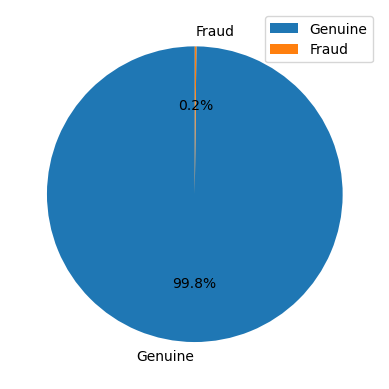

The entries in Genuine are 284315
The entries in Fraud are 492


In [23]:
cat_UVA(cdf, cdf['Class'], ["Genuine", "Fraud"])

**This shows high class imbalance in the dataset which needs to be processed before proceeding with ML modeling**

3.1.2 Ammount 

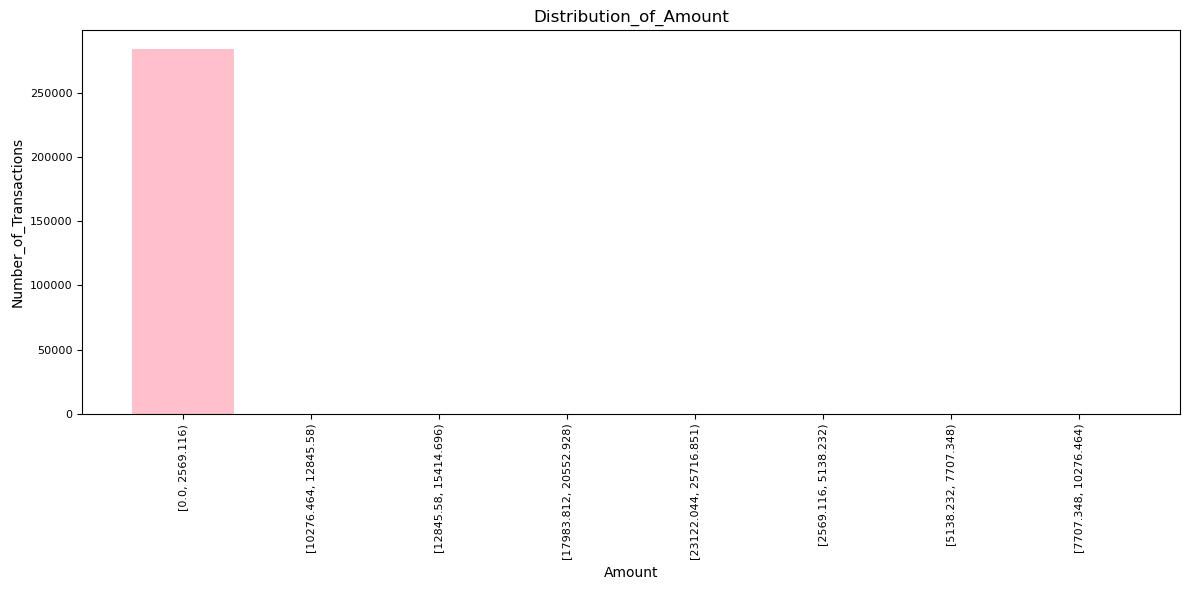

[0.0, 2569.116) has the highest number of entries: 284395


In [32]:


# Example usage with 1000 bins
num_cont_UVA(cdf, cdf['Amount'], bin_no=10, my_color=['pink'], my_list=["Amount", "Number_of_Transactions", "Distribution_of_Amount"])


**Transactions predominantly take place within the range of Rs 1027 to Rs 2055, as indicated by the data analysis conducted.**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def num_cont_UVA2(data, x, window_size=10, my_color='pink', my_list=["x_lab", "y_lab", "title"]):
    """
    A function for univariate analysis of continuous numerical variables with a moving average line graph.
    """
    # Calculate the moving average
    x_ma = x.rolling(window=window_size).mean()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(x_ma, color=my_color, label="Moving Average")
    plt.scatter(range(len(x)), x, color='gray', alpha=0.5, label="Data Points")  # Scatter plot for individual data points
    plt.xlabel(my_list[0])
    plt.ylabel(my_list[1])
    plt.title(my_list[2])
    plt.legend()
    plt.xticks(rotation=90, fontsize=8)  # Adjust fontsize and rotation for X-axis labels
    plt.yticks(fontsize=8)  # Adjust fontsize for Y-axis labels
    plt.tight_layout()  # Ensures the labels do not overlap
    plt.show()



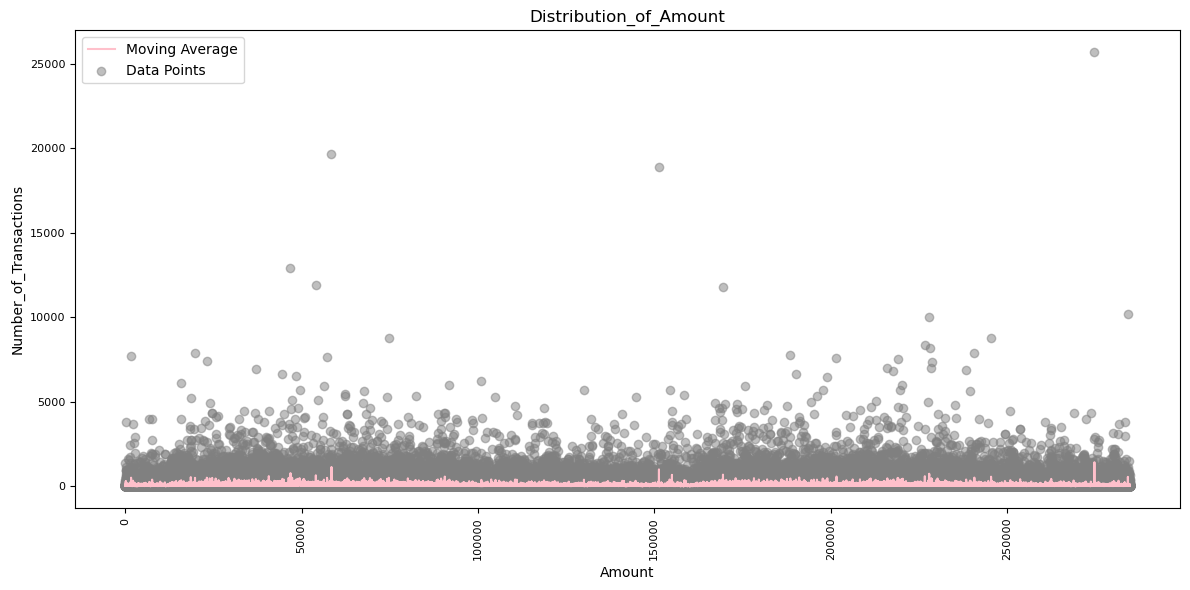

In [35]:
# Example usage with a window size of 20 for the moving average
num_cont_UVA2(cdf, cdf['Amount'], window_size=20, my_color='pink', my_list=["Amount", "Number_of_Transactions", "Distribution_of_Amount"])


3.1.3 Time

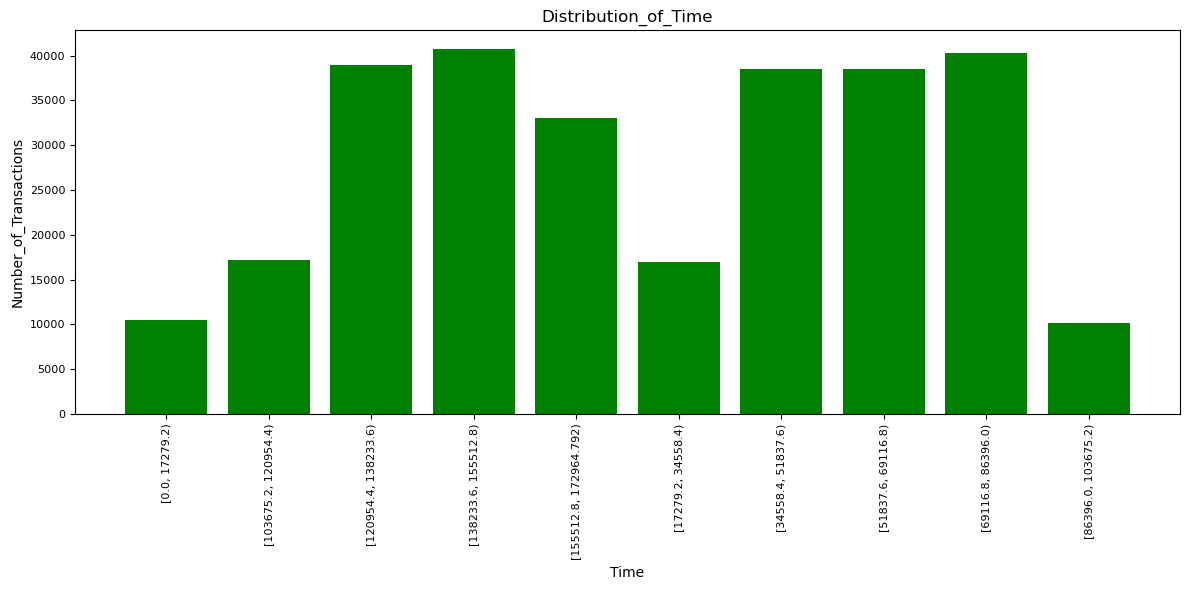

[138233.6, 155512.8) has the highest number of entries: 40779


In [39]:
num_cont_UVA(cdf, cdf['Time'],bin_no=10,my_color=['green'],my_list=["Time","Number_of_Transactions","Distribution_of_Time"])

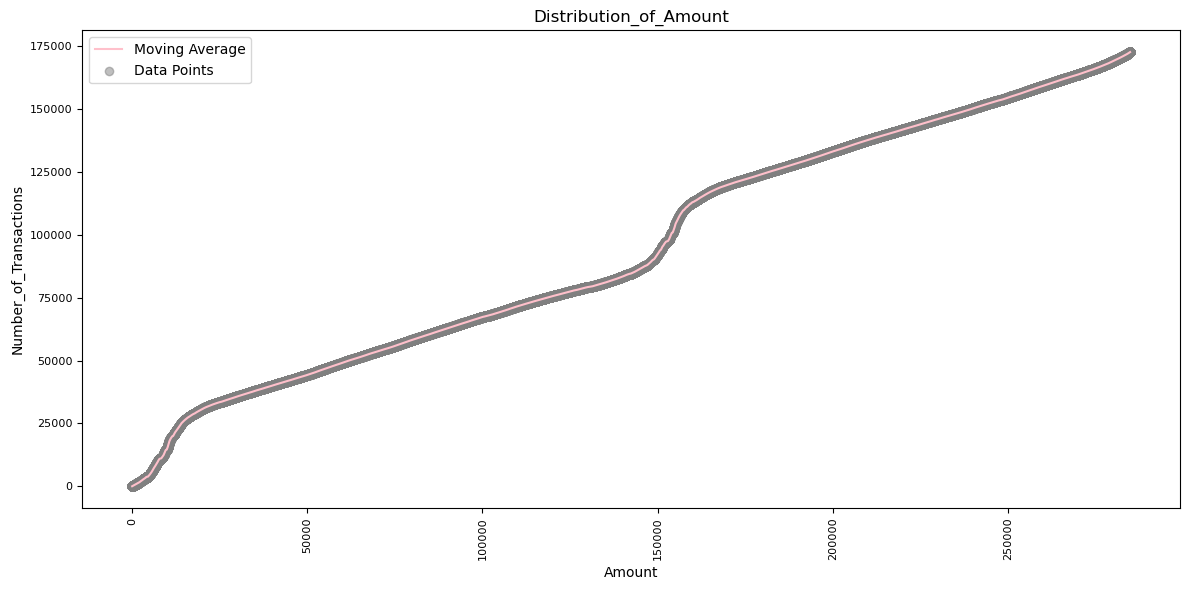

In [36]:
num_cont_UVA2(cdf, cdf['Time'], window_size=20, my_color='pink', my_list=["Amount", "Number_of_Transactions", "Distribution_of_Amount"])

**3.2 Multivariate**

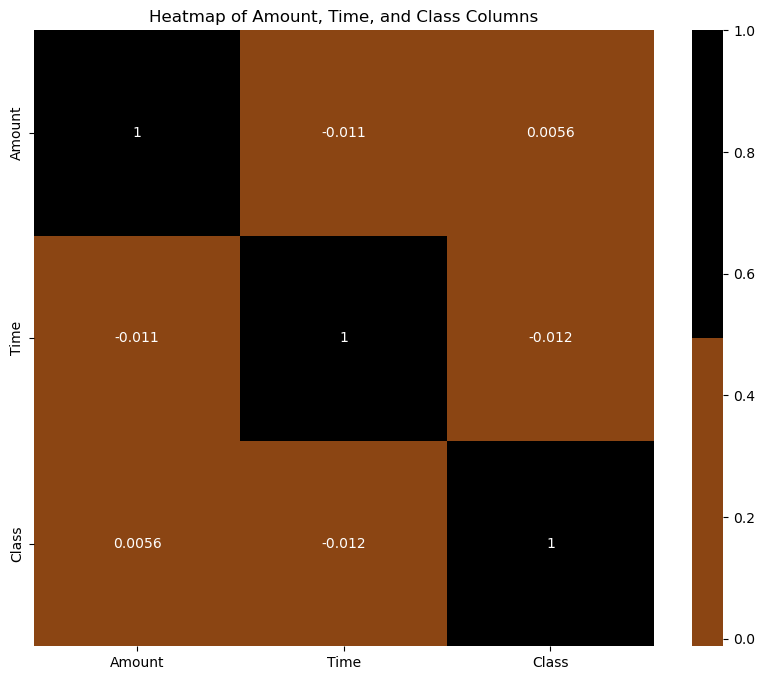

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cdf is your DataFrame
columns_to_plot = cdf[['Amount', 'Time', 'Class']]
custom_palette = ["#8B4513", "#000000"]  # Hex color codes for brown and black
# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(columns_to_plot.corr(), annot=True, cmap=custom_palette)

# Add title
plt.title('Heatmap of Amount, Time, and Class Columns')

# Show the plot
plt.show()


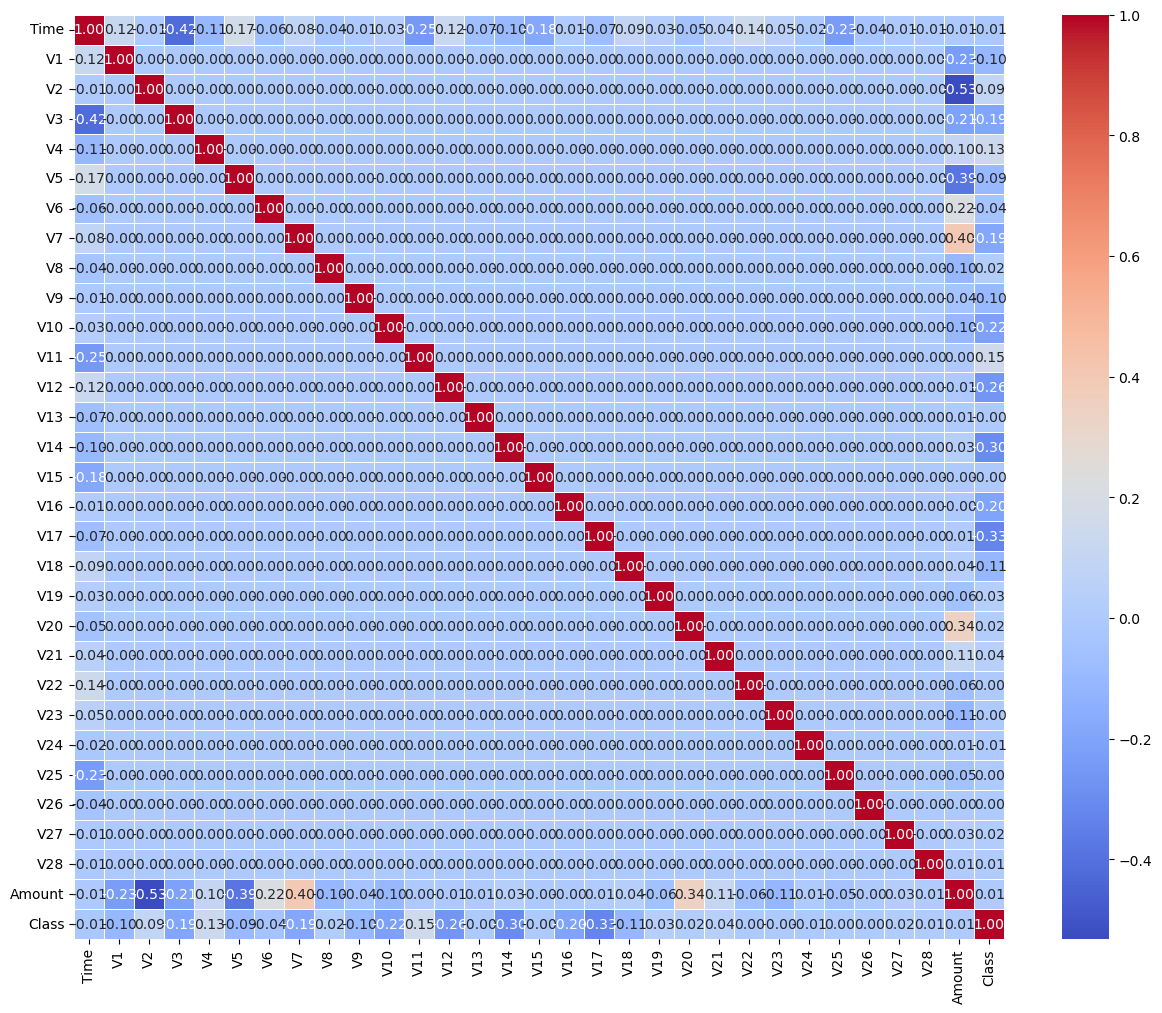

In [25]:
# Calculate the correlation matrix
correlation_matrix = cdf.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)



# Show the plot
plt.show()

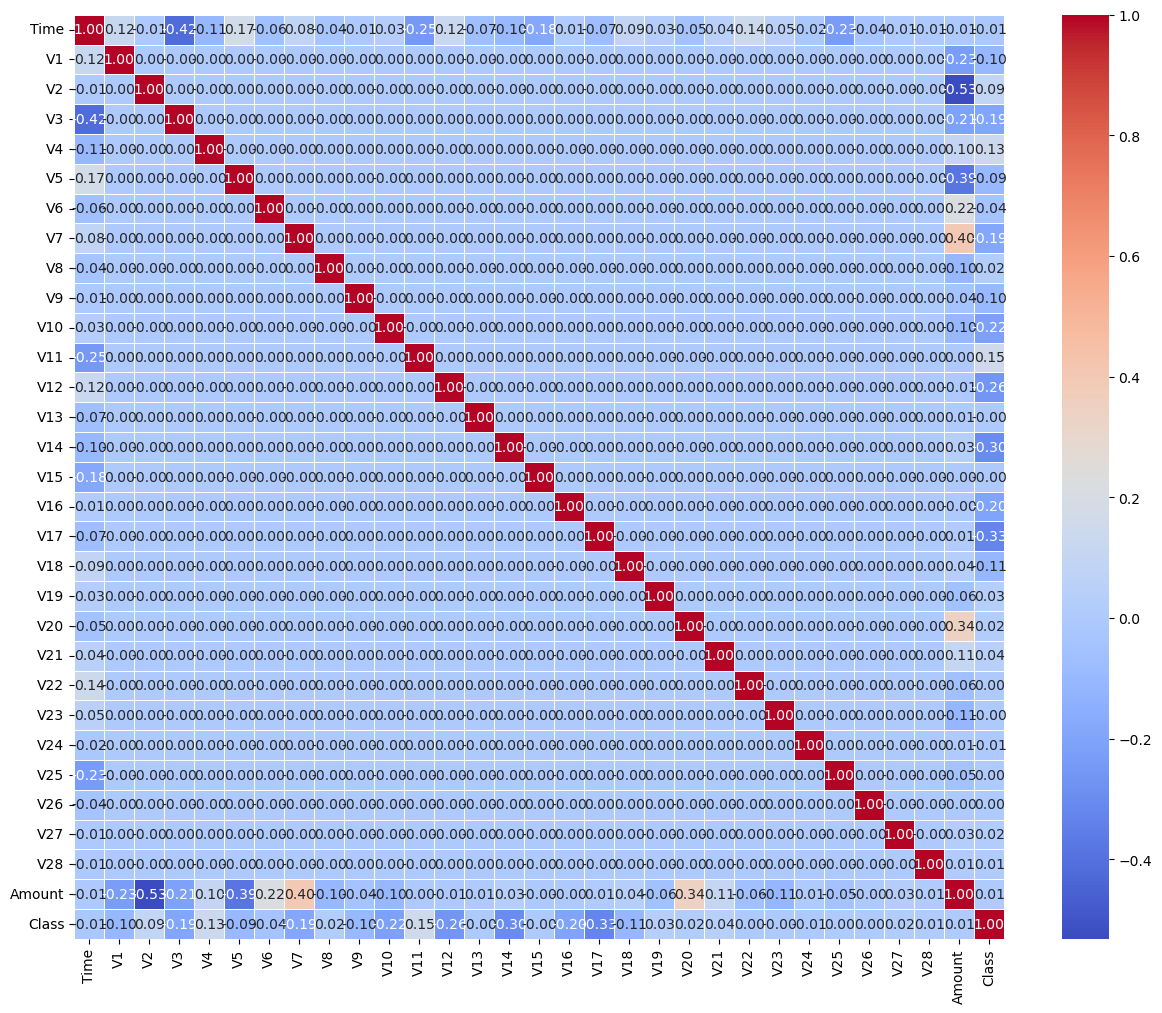

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# If not, you should replace 'df' with the actual name of your DataFrame

# Sample code to create a DataFrame (replace this with your actual data)
# df = pd.DataFrame(your_data, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'])

# Calculate the correlation matrix
correlation_matrix = cdf.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display a list of highly correlated variables
threshold = 0.8  # You can adjust this threshold as needed
highly_correlated_vars = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.index[j]
            highly_correlated_vars.add((colname, rowname))

# Print the list of highly correlated variables
if highly_correlated_vars:
    print("Highly Correlated Variables:")
    for pair in highly_correlated_vars:
        print(f"{pair[0]} and {pair[1]} are highly correlated")

# Show the plot
plt.show()

In [31]:
# Display a list of highly correlated variables
threshold = 0.3  # You can adjust this threshold as needed
highly_correlated_vars = np.where(np.abs(correlation_matrix) > threshold)

# Print the list of highly correlated variables
if highly_correlated_vars[0].size > 0:
    print("Highly Correlated Variables:")
    for i, j in zip(*highly_correlated_vars):
        if i != j and i < j:
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.index[j]
            print(f"{colname} and {rowname} are highly correlated")


Highly Correlated Variables:
Time and V3 are highly correlated
V2 and Amount are highly correlated
V5 and Amount are highly correlated
V7 and Amount are highly correlated
V14 and Class are highly correlated
V17 and Class are highly correlated
V20 and Amount are highly correlated
